In [1]:
import matplotlib.pyplot as plt
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import celltypist

In [2]:
import session_info
session_info.show()

In [3]:
sc.settings.set_figure_params(dpi=80)

# Read in adata

In [4]:
objects_dir = '/home/kk837/rds/rds-teichlab-C9woKbOCf2Y/kk837/Foetal/anndata_objects/Xenium'
path_adata = f'{objects_dir}/C194-HEA-0-FFPE-1_Hst45-HEA-0-FFPE-1_concat_5K_filtered_raw.h5ad'
adata = sc.read_h5ad(path_adata)
adata

AnnData object with n_obs × n_vars = 362277 × 5001
    obs: 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'genomic_control_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'nucleus_count', 'segmentation_method', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_150_genes', 'n_counts', 'n_genes', 'tissue_block_id', 'celltypist_coarse', 'conf_score_coarse', 'celltypist_coarse_fin', 'celltypist_coarse2midmod', 'conf_score_coarse2midmod', 'celltypist_mid_fin', 'celltypist_midmod2fine', 'conf_score_midmod2fine', 'pca_harmony_leiden_0.2', 'pca_harmony_leiden_0.3', 'pca_harmony_leiden_0.4', 'pca_harmony_leiden_0.5', 'pca_harmony_leiden_0.8', 'pca_harmony_leiden_1.0', 'pca_harmony_leiden_1.5', 'pca_harmony_leiden_2.0', 'pca_harmony_leiden_

In [5]:
os.getcwd()

'/rfs/project/rfs-iCNyzSAaucw/kk837/notebooks/Foetal/Xenium/5K/C194_Hst45/CamU'

In [6]:
adata.X.data[:5]

array([5., 1., 1., 2., 2.], dtype=float32)

# Plot leiden clusters

In [7]:
latent_space = 'pca_harmony'
leiden_keys=[]
for res in [0.2,0.3,0.4,0.5,0.8,1.0,1.5,2.0,3.0]:
    leiden_key = f"leiden_{res}"
    key_added=f"{latent_space}_{leiden_key}"
    leiden_keys.append(key_added)

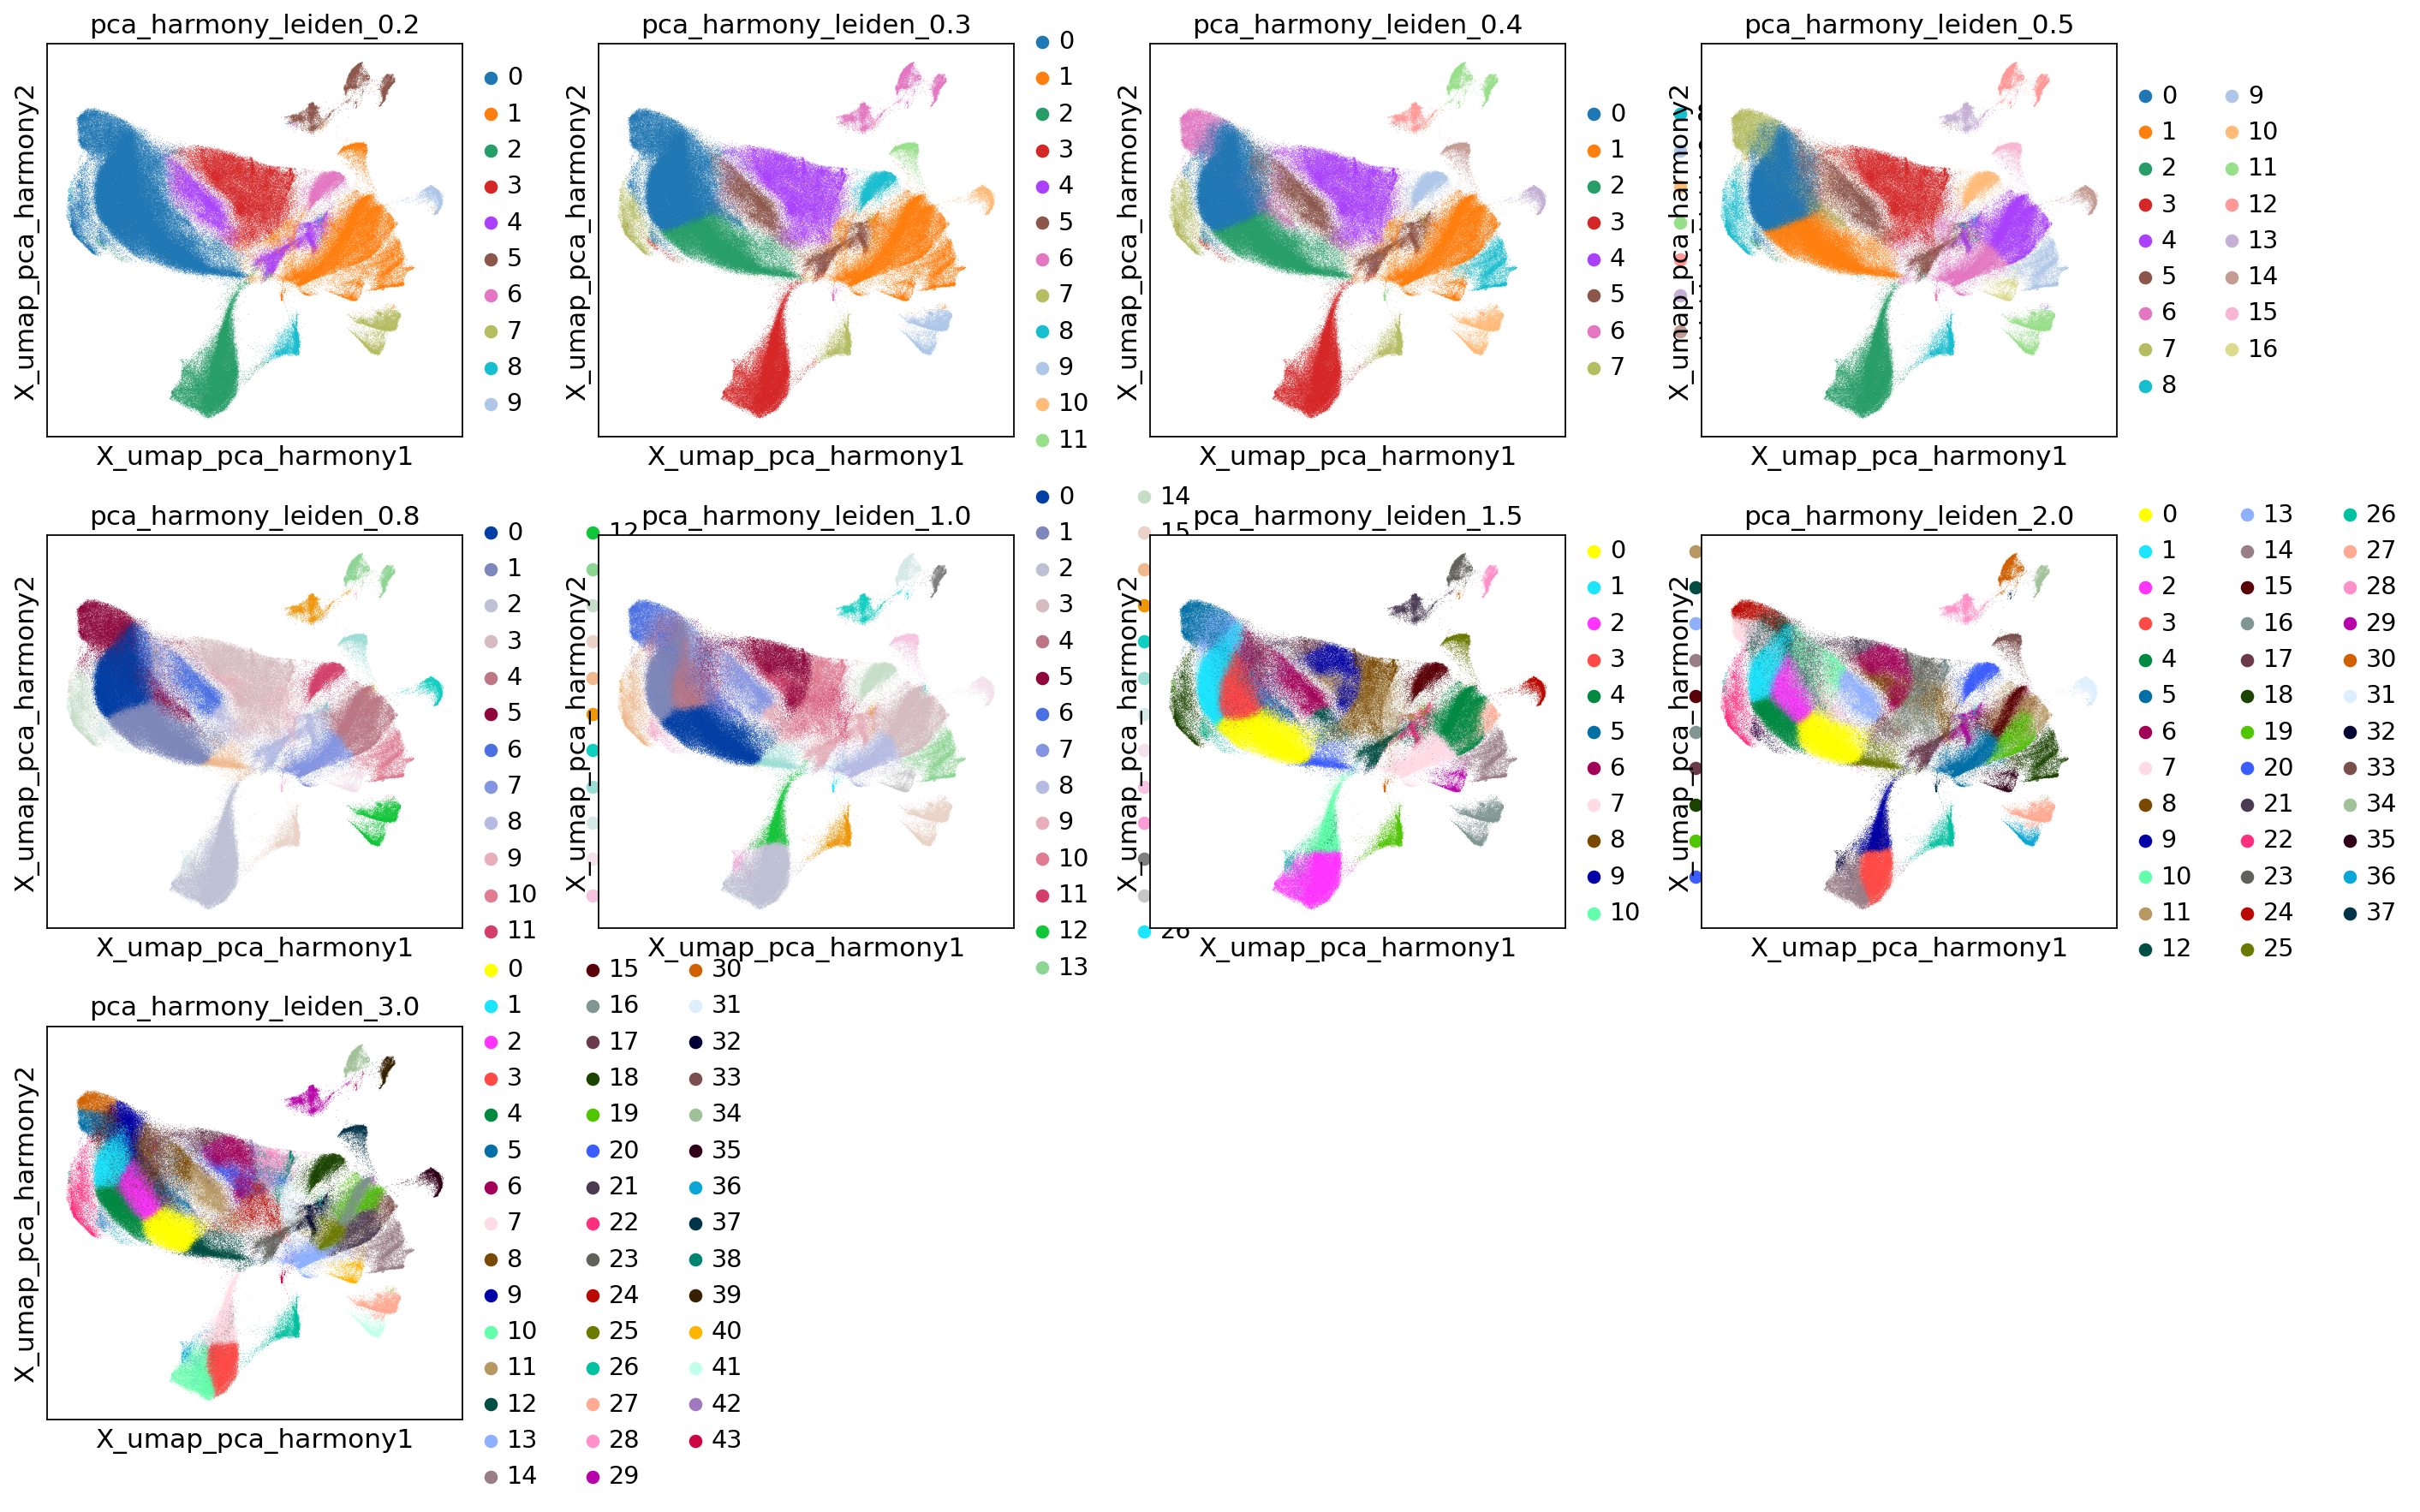

In [8]:
sc.pl.embedding(adata, basis=f"X_umap_{latent_space}",
                    color=leiden_keys,
                   ncols=4
                   )

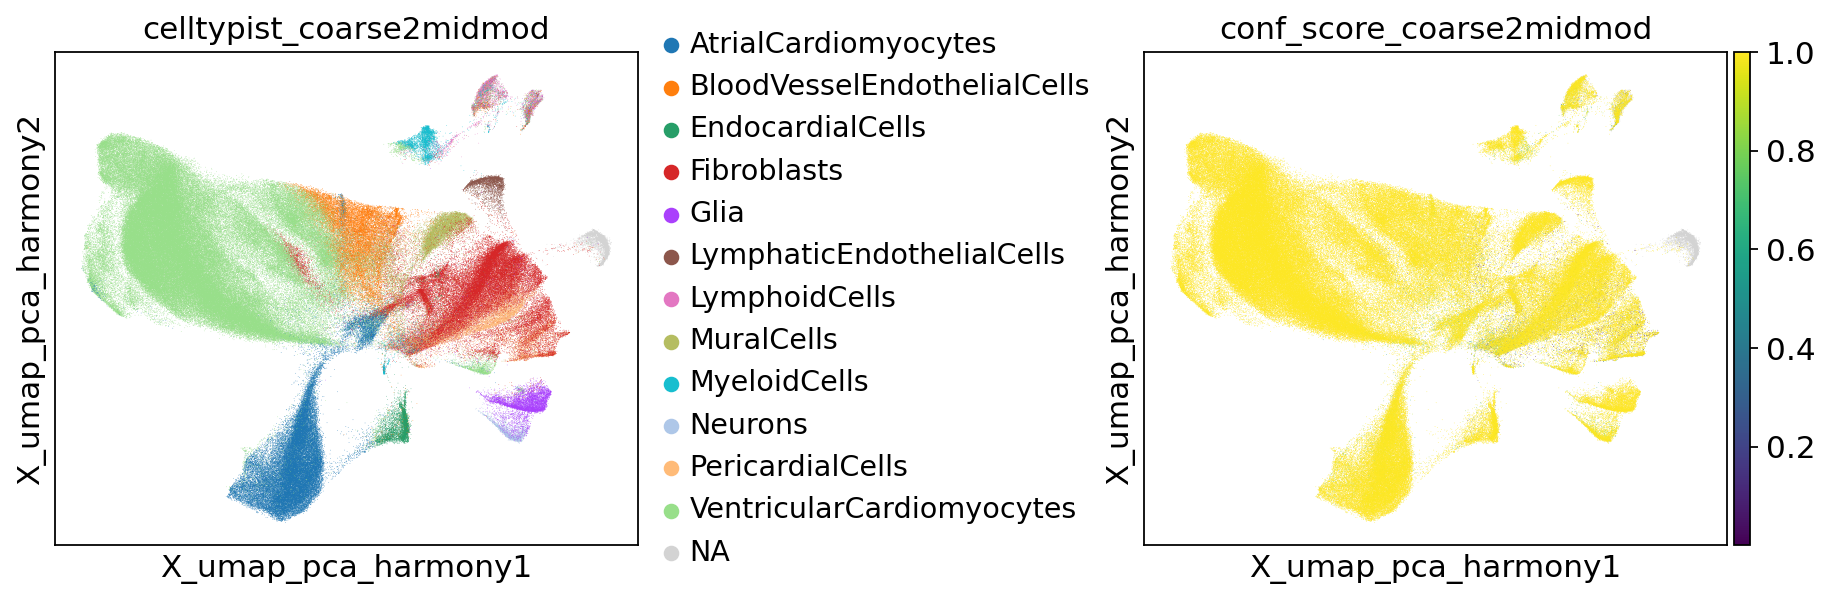

In [9]:
# plot celltypist prediction, for reference
sc.pl.embedding(adata,
                    basis=f"X_umap_{latent_space}",
                    color=['celltypist_coarse2midmod','conf_score_coarse2midmod'],
                   ncols=4,wspace=0.7
                   )

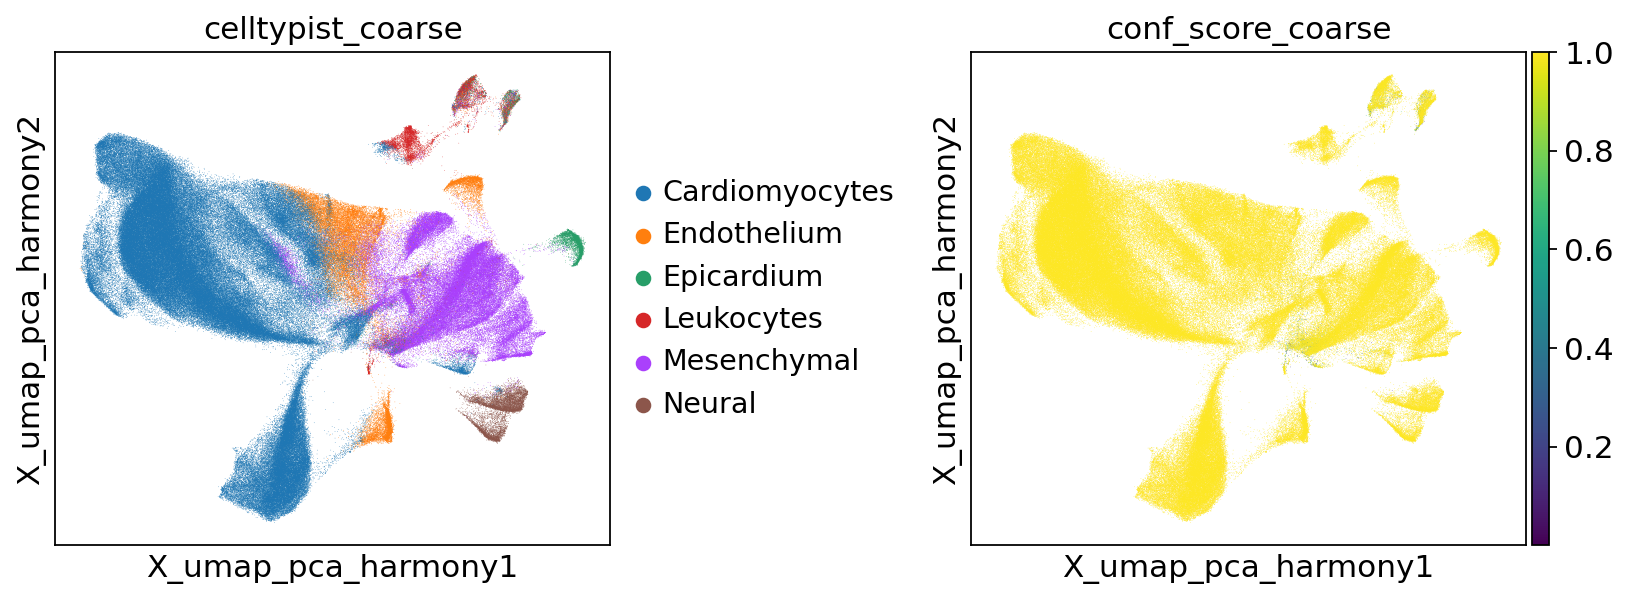

In [10]:
sc.pl.embedding(adata,
                    basis=f"X_umap_{latent_space}",
                    color=['celltypist_coarse','conf_score_coarse'],
                   ncols=4,wspace=0.5
                   )

# Mark ?suspicious clusters in the center

In [14]:
leiden_key_sel = 'pca_harmony_leiden_1.0'

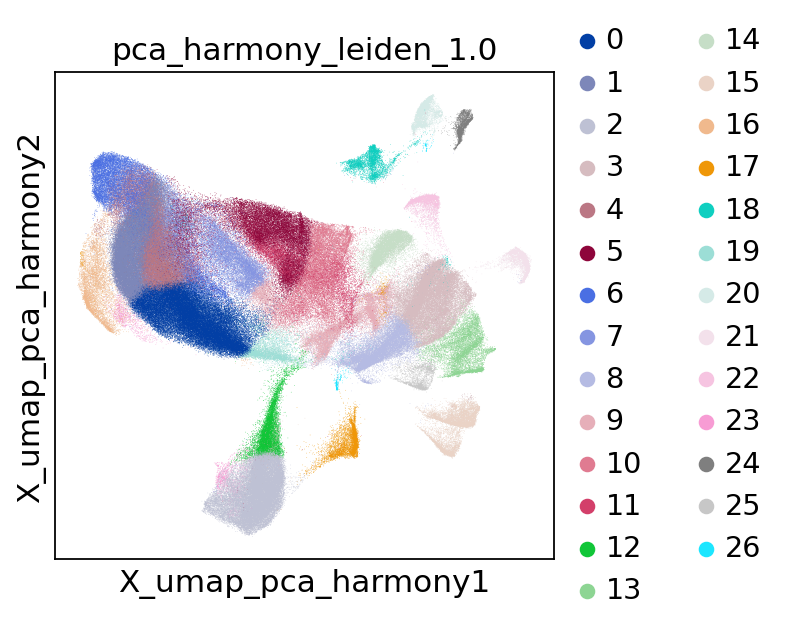

In [15]:
sc.pl.embedding(adata,
                    basis=f"X_umap_{latent_space}",
                    color=leiden_key_sel,
                   ncols=4
                   )

categories: 0, 1, 2, etc.
var_group_labels: CM, FB, EC, etc.


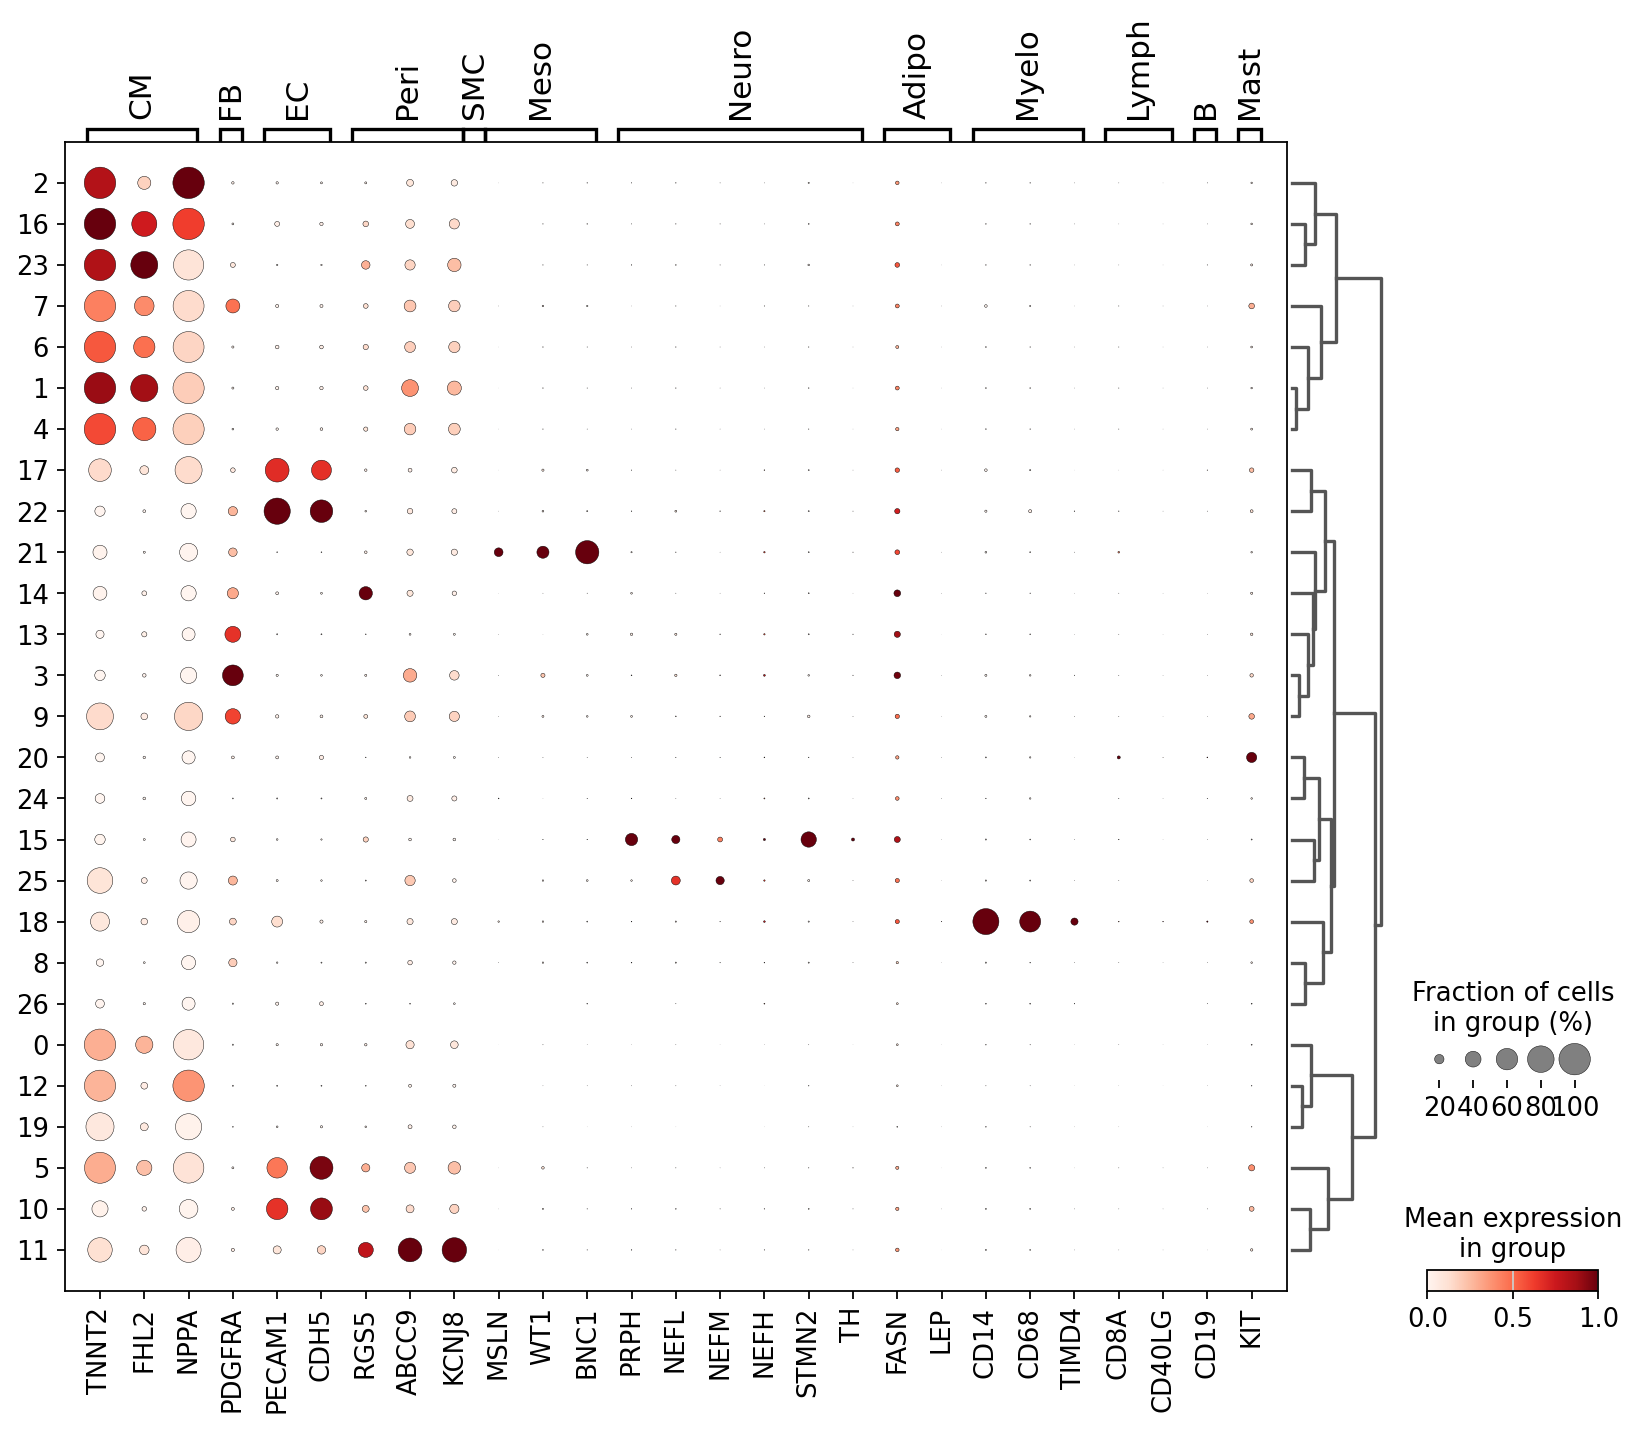

In [16]:
markers = {
    'CM': ['TTN', 'TNNT2','MYH6',
        'MYH7', 'MYL2', 'FHL2', # vCN
            'NPPA', 'MYL7', 'MYL4'], #aCM
    'FB': ['DCN', 'GCN', 'PDGFRA','COL1A1','COL1A2'],
    'EC': ['VWF', 'PECAM1', 'CDH5','RGCC', 'FABP5',],
    'Peri': ['RGS5', 'ABCC9', 'KCNJ8'],
    'SMC': ['MYH11', 'TAGLN', 'ACTA2'],
    'Meso': ['MSLN', 'WT1', 'BNC1'],
    'Neuro': ['PLP1', 'NRXN1', 'NRXN3','PRPH', 'NEFL', 'NEFM', 'NEFH', 'STMN2', 'SST', 'SLC10A4', 'SLC18A3', 'TH', 'NPY'],
    'Adipo': ['GPAM', 'FASN', 'LEP'],
    'Myelo': ['CD14', 'C1QA', 'CD68','LYVE1','TIMD4'],
    'Lymph': ['CD8A', 'IL7R', 'CD40LG'],
    'B': ['CD19','SDC1','IGHG1','IGHA1'],
    'Mast': ['KIT', 'CPA3'],
}

for key in markers.keys():
    markers[key]=[x for x in markers[key] if x in adata.var_names]

sc.tl.dendrogram(adata, groupby=leiden_key_sel)
sc.pl.dotplot(adata,
              markers, 
              groupby=leiden_key_sel,
              dendrogram=True,
              standard_scale="var",
              color_map="Reds",
              swap_axes=False,
             )

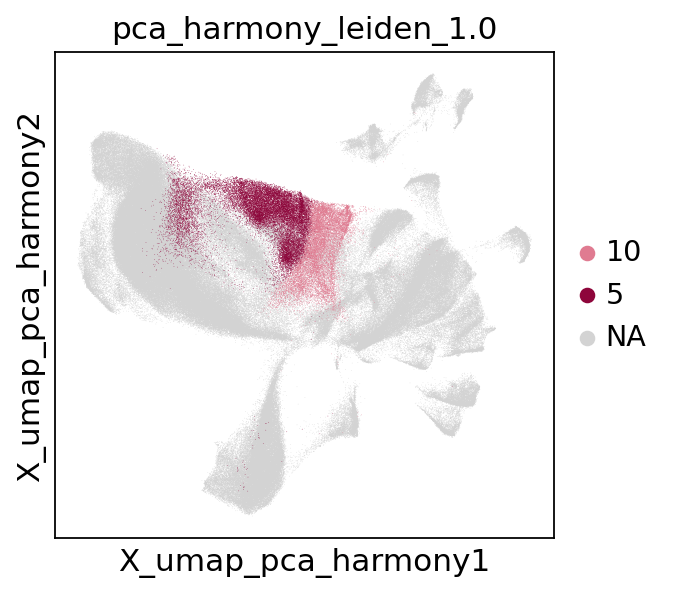

In [18]:
# mark potentially multiple cell type cells
clusters_to_mark = ['5','10']
sc.pl.embedding(adata,
                    basis=f"X_umap_{latent_space}",
                    color=leiden_key_sel,
                groups=clusters_to_mark,
                   ncols=4
                   )

... storing 'multi_celltypes_coarse' as categorical


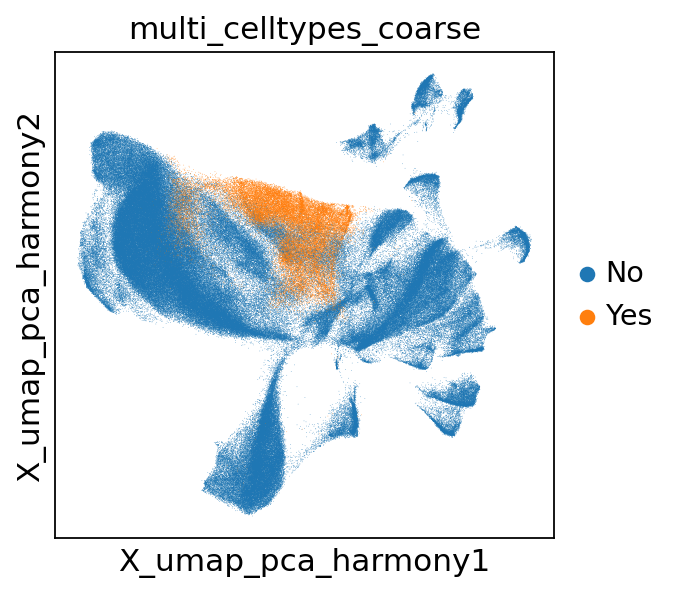

In [19]:
adata.obs['multi_celltypes_coarse'] = 'No'
obsnames = adata.obs_names[adata.obs[leiden_key_sel].isin(clusters_to_mark)]
adata.obs.loc[obsnames,'multi_celltypes_coarse']='Yes'
sc.pl.embedding(adata,
                    basis=f"X_umap_{latent_space}",
                    color='multi_celltypes_coarse',
                
                   )

In [20]:
adata.obs_names

Index(['C194-HEA-0-FFPE-1_aaaafiob-1', 'C194-HEA-0-FFPE-1_aaaajopp-1',
       'C194-HEA-0-FFPE-1_aaaanald-1', 'C194-HEA-0-FFPE-1_aaabdjka-1',
       'C194-HEA-0-FFPE-1_aaabglmg-1', 'C194-HEA-0-FFPE-1_aaachofo-1',
       'C194-HEA-0-FFPE-1_aaadibmf-1', 'C194-HEA-0-FFPE-1_aaaenklb-1',
       'C194-HEA-0-FFPE-1_aaafclmo-1', 'C194-HEA-0-FFPE-1_aaafjldl-1',
       ...
       'Hst45-HEA-0-FFPE-1_oigbdbao-1', 'Hst45-HEA-0-FFPE-1_oigbenna-1',
       'Hst45-HEA-0-FFPE-1_oigbmoed-1', 'Hst45-HEA-0-FFPE-1_oigcbndd-1',
       'Hst45-HEA-0-FFPE-1_oigcinom-1', 'Hst45-HEA-0-FFPE-1_oigcomgh-1',
       'Hst45-HEA-0-FFPE-1_oigeappc-1', 'Hst45-HEA-0-FFPE-1_oigeiifh-1',
       'Hst45-HEA-0-FFPE-1_oigeklem-1', 'Hst45-HEA-0-FFPE-1_oigenchi-1'],
      dtype='object', length=362277)

# Save

In [21]:
adata.write(path_adata)
path_adata

'/home/kk837/rds/rds-teichlab-C9woKbOCf2Y/kk837/Foetal/anndata_objects/Xenium/C194-HEA-0-FFPE-1_Hst45-HEA-0-FFPE-1_concat_5K_filtered_raw.h5ad'